In [5]:
pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/126.0 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  122.9/126.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
#without polarity
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
df = pd.read_excel('cleaned_tweets.xlsx')
analyzer = SentimentIntensityAnalyzer()
df['Tweet'] = df['Tweet'].astype(str)
def analyze_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Tweet'].apply(analyze_sentiment)
df.to_excel('sentiment2.xlsx', index=False)


In [2]:
#with polarity
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load the dataset
df = pd.read_excel('sorted_tweets2.xlsx')
analyzer = SentimentIntensityAnalyzer()
df['Tweet'] = df['Tweet'].astype(str)

def analyze_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive', compound_score
    elif compound_score <= -0.05:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

df['Sentiment'], df['Polarity'] = zip(*df['Tweet'].apply(analyze_sentiment))

df.to_excel('sentiment_analysis_results.xlsx', index=False)


In [9]:
#with polarity
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

df = pd.read_excel('cleaned_tweets.xlsx')

analyzer = SentimentIntensityAnalyzer()

df['Tweet'] = df['Tweet'].astype(str)

def analyze_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive', compound_score
    elif compound_score <= -0.05:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

df['Sentiment'], df['Polarity'] = zip(*df['Tweet'].apply(analyze_sentiment))

df.to_excel('sentiment2.xlsx', index=False)


In [11]:
#with polarity
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

df = pd.read_excel('cleaned_tweets_with emoji.xlsx')


analyzer = SentimentIntensityAnalyzer()


df['Tweet'] = df['Tweet'].astype(str)


def analyze_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive', compound_score
    elif compound_score <= -0.05:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

df['Sentiment'], df['Polarity'] = zip(*df['Tweet'].apply(analyze_sentiment))


df.to_excel('sentiment2_with emoji.xlsx', index=False)


In [ ]:
pip install wordcloud

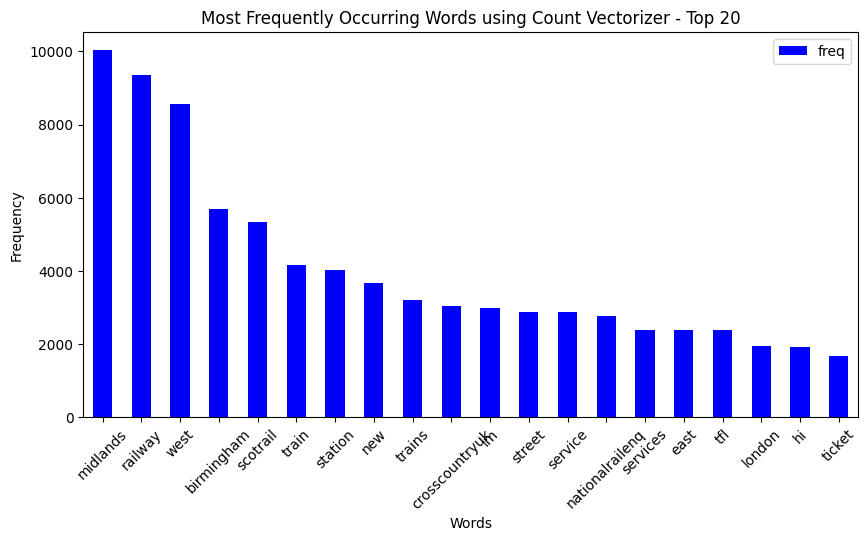

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

tweetdata = pd.read_excel("sentiment_analysis_results.xlsx")
tweetdata['Tweet'] = tweetdata['Tweet'].fillna('')
tweetdata['Tweet'] = tweetdata['Tweet'].astype(str)
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(tweetdata['Tweet'])
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(10, 5), color='blue')
plt.title("Most Frequently Occurring Words using Count Vectorizer - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

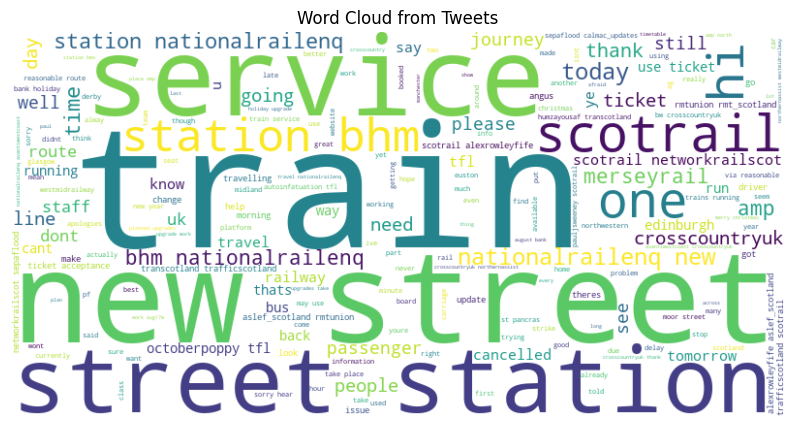

In [10]:
#filtering out toc names
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_excel('sentiment_analysis_results.xlsx')
df['Tweet'] = df['Tweet'].astype(str)
# Extract the text from the 'Tweet' column
tweets = df['Tweet'].tolist()

text = ' '.join(tweets)

filtered_text = [word for word in text.split() if word.lower() not in ['west','im','birmingham', 'midlands', 'east', 'avanti', 'coast', 'railway', 'london', 'scotrail', 'cross', 'country', 'tfl', 'mersey']]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_text))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Tweets')
plt.show()


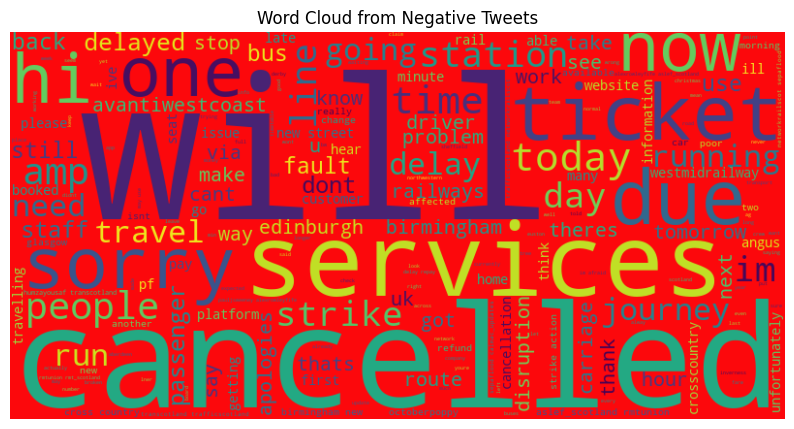

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_excel('sentiment_analysis_results.xlsx')
df['Tweet'] = df['Tweet'].astype(str)

negative_tweets = df[df['Sentiment'] == 'Negative']['Tweet'].tolist()

negative_text = ' '.join(negative_tweets)

filtered_negative_text = [word for word in negative_text.split() if word.lower() not in ['west', 'midlands', 'east', 'avanti', 'coast', 'railway', 'london', 'scotrail','trains','service','train', 'crosscountryuk', 'tfl', 'merseyrail']]

wordcloud = WordCloud(width=800, height=400, background_color='#fc080c', colormap='viridis').generate(' '.join(filtered_negative_text))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Negative Tweets')
plt.show()


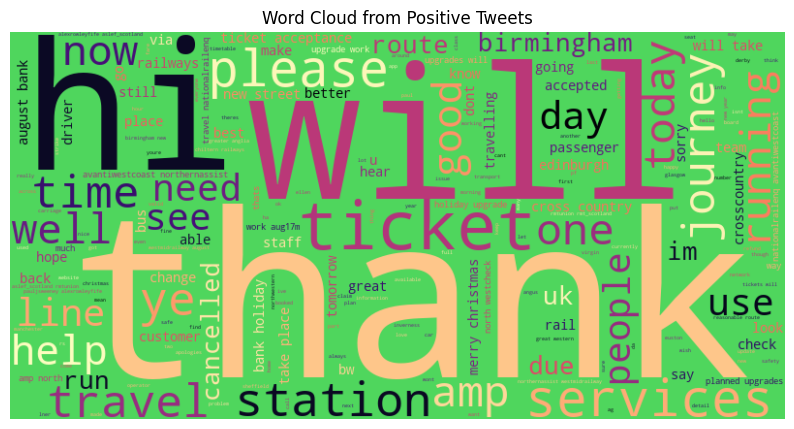

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_excel('sentiment_analysis_results.xlsx')
df['Tweet'] = df['Tweet'].astype(str)

negative_tweets = df[df['Sentiment'] == 'Positive']['Tweet'].tolist()

negative_text = ' '.join(negative_tweets)

filtered_positive_text = [word for word in negative_text.split() if word.lower() not in ['west', 'midlands', 'east', 'avanti', 'coast', 'railway', 'london', 'scotrail','trains' ,'service','train', 'crosscountryuk', 'tfl', 'merseyrail']]

wordcloud = WordCloud(width=800, height=400, background_color='#4fd65d', colormap='magma').generate(' '.join(filtered_positive_text))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Positive Tweets')
plt.show()


Dataset Shape: (27782, 6)

Columns: Index(['Tweet ID', 'Username', 'Tweet', 'TOC', 'Sentiment', 'Polarity'], dtype='object')

Sample Data:
               Tweet ID           Username  \
0  1752234802621600000     innisfree1962    
1  1751880650758429952    TransportForWM    
2  1751867869720140032   CllrTimHuxtable    
3  1751258888144329984    TransportForWM    
4  1751744628653530112    MichaelBev2000    

                                               Tweet            TOC Sentiment  \
0  @westmidrailway @andy4wm @wmrailexecutive @tra...  west midlands  Positive   
1  @bigsprouttalent hi simon kings norton rail st...  west midlands   Neutral   
2  aslef industrial action affecting @westmidrail...  west midlands  Negative   
3  aslef industrial action announced end january ...  west midlands   Neutral   
4  diamond west midlands @diamondbuses wright str...  west midlands  Positive   

   Polarity  
0     0.128  
1     0.000  
2    -0.250  
3     0.000  
4     0.340  


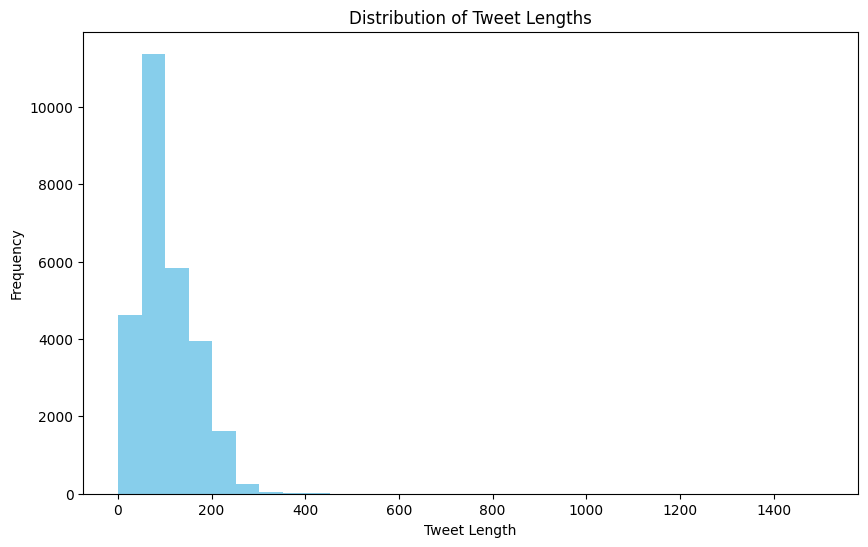

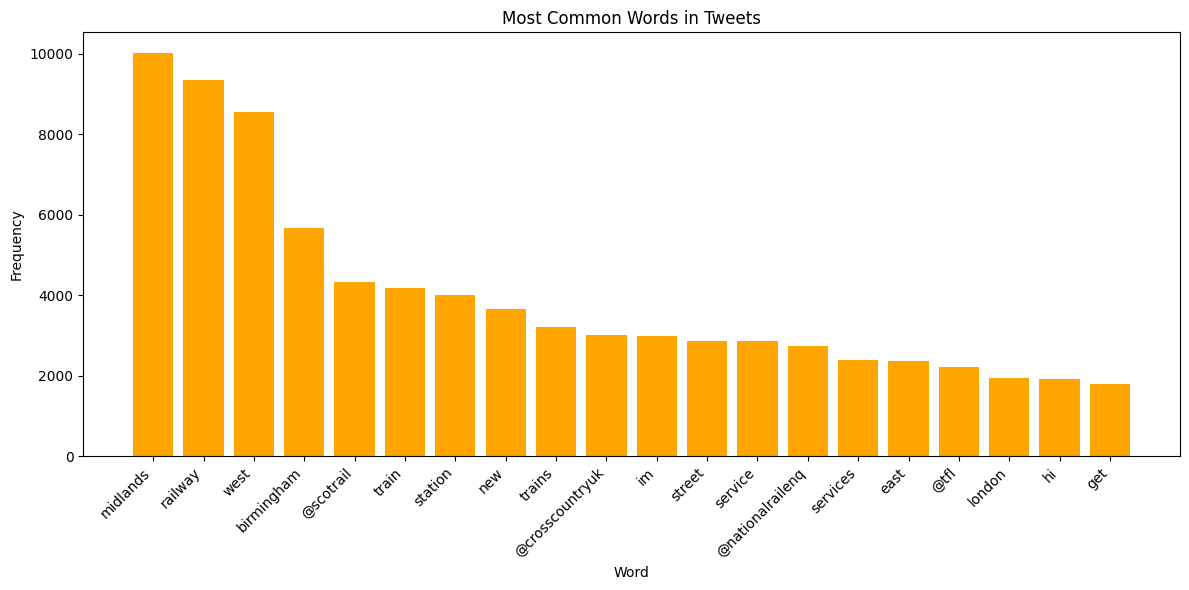

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


tweetdata = pd.read_excel("sentiment_analysis_results.xlsx")
tweetdata['Tweet'] = tweetdata['Tweet'].astype(str)
# Display basic information about the dataset
print("Dataset Shape:", tweetdata.shape)
print("\nColumns:", tweetdata.columns)
print("\nSample Data:\n", tweetdata.head())



plt.figure(figsize=(10, 6))
tweetdata['Tweet'].str.len().hist(bins=30, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# frequency distribution
from collections import Counter
word_counts = Counter(' '.join(tweetdata['Tweet']).split())
most_common_words = word_counts.most_common(20)
plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_words), color='orange')
plt.title('Most Common Words in Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd


df = pd.read_excel("sentiment_data_with_predicted_sentiment.xlsx")


def map_to_region(toc):
    if toc == "avanti west coast":
        return [  "Greater London", "North West England", "Scotland","South East England", "West Midlands","Wales"]
    elif toc == "cross country":
        return  ["East Midlands","North East England","North West England","South West England","West Midlands","Yorkshire & the Humber"]
    elif toc == "scot rail":
        return ["Scotland"]
    elif toc == "mersey rail":
        return ["North West England"]
    elif toc == "east midlands railway":
        return  ["East Midlands","Greater London","North West England","Yorkshire & the Humber"]
    elif toc == "west midlands railway":
        return  ["Greater London", "West Midlands","East"]
    elif toc == "tfl":
        return ["Greater London"]
    else:
        return []


df['Region'] = df['TOC'].apply(map_to_region)

df.to_excel("sentiment_data_with_predicted_sentiment.xlsx", index=False)


In [5]:
import pandas as pd

df = pd.read_excel('sentiment_data_with_predicted_sentiment.xlsx')

region_sentiment_count = df.groupby(['Region', 'predicted_sentiment']).size().unstack(fill_value=0)


region_sentiment_count.to_excel('predicted region toc count.xlsx')


In [9]:
import pandas as pd

data = pd.read_excel('predicted region toc count.xlsx')

toc_regions_mapping = {
    'East midlands Railway': ["East Midlands","Greater London","North West England","Yorkshire & the Humber"],
    'Cross Country': ["East Midlands","North East England","North West England","South West England","West Midlands","Yorkshire & the Humber"],
    'Avanti West Coast': [  "Greater London", "North West England", "Scotland","South East England", "West Midlands","Wales"],
    'West Midlands Railway': ["Greater London", "West Midlands","East"],
    'Transport for London': ['Greater London'],
    'Mersey Rail': ['North West England'],
    'Scot Rail': ['Scotland']
}

result = []

for toc, regions in toc_regions_mapping.items():
    
    toc_data = data[data['TOC'] == toc]
    
   
    for region in regions:
        
        positive_count = toc_data['positive'].sum()
        negative_count = toc_data['negative'].sum()
        
        
       
        result.append({
            'Region': region,
            'TOC': toc,
            'Positive': positive_count,
            'Negative': negative_count,
            
        })


result_df = pd.DataFrame(result)


result_df.to_excel('toc_Psentiment_by_region.xlsx', index=False)


In [11]:
import pandas as pd


df = pd.read_excel("toc_Psentiment_by_region.xlsx")


region_to_id = {
    "East Midlands": "E15000004",
    "Yorkshire & the Humber": "E15000003",
    "North East England": "E15000001",
    "South West England": "E15000009",
    "South East England": "E15000008",
    "West Midlands": "E15000005",
    "Wales": "W08000001",
    "East": "E15000006",
    "Greater London": "E15000007",
    "North West England": "E15000002",
    "Scotland": "S15000001"
}

df['Region Id'] = df['Region'].map(region_to_id)

df.to_excel("toc_Psentiment_by_region.xlsx", index=False)
